## The third In-class-exercise (10/06/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [1]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
 
My aim is to gain insight into the customer's perceptions of the oximeter product, which has been widely used during the COVID-19 pandemic for health monitoring purposes. Specifically, I want to determine the product's useful features and gather customer feedback about it.

To begin with, I will focus on a specific company's product and perform sentiment classification on customer reviews. By analyzing the frequency vectors for the data cloud, I can gain information about the product's features that customers are reviewing. Sentiment classification will help me understand the users' feedback.

For my text analysis, I will use the Text categorization method to identify the emotions expressed in the product reviews. Each statement's primary structure, purposes, and use will be classified based on the rules and circumstances according to the part of speech it belongs to. The speech tags I will focus on are adjectives, adverbs, conjunctions, nouns, verbs, pronouns, and interjections.

All reviews marked with POS information will be transformed into a vector of integers and given as input to a classifier. The classifier will determine the emotion expressed in the text.

The product reviews for the "Zacurate Pro Series 500DL Fingertip Pulse Oximeter" can be found at this link: https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3

'''

'\nPlease write you answer here:\n \nMy aim is to gain insight into the customer\'s perceptions of the oximeter product, which has been widely used during the COVID-19 pandemic for health monitoring purposes. Specifically, I want to determine the product\'s useful features and gather customer feedback about it.\n\nTo begin with, I will focus on a specific company\'s product and perform sentiment classification on customer reviews. By analyzing the frequency vectors for the data cloud, I can gain information about the product\'s features that customers are reviewing. Sentiment classification will help me understand the users\' feedback.\n\nFor my text analysis, I will use the Text categorization method to identify the emotions expressed in the product reviews. Each statement\'s primary structure, purposes, and use will be classified based on the rules and circumstances according to the part of speech it belongs to. The speech tags I will focus on are adjectives, adverbs, conjunctions, n

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [2]:
# You code here (Please add comments in the code): 
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

titles = []
text=[]
for pg in range(1,150):
  url = 'https://www.amazon.com/product-reviews/B08PNKRPCY/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews'

  pg = requests.get(url, headers=Headers)
  s = BeautifulSoup(pg.content,'html.parser')
  revw_t = s.find_all('a',class_='review-title-content')
  for i in range(len(revw_t)):
    titles.append(revw_t[i].get_text().strip())
  revw_txt= s.find_all('span',class_='review-text-content')
  for r in range(0,len(revw_txt)):
    text.append(revw_txt[r].get_text().strip()) 
data_frame = pd.DataFrame({
    'Title' : titles,
    'Review': text
})
print(f'Shape of the data frame: {data_frame.shape}')
data_frame

Shape of the data frame: (120, 2)


,Title,Review
0,I love it! No scratches or dents..,I was worried about ordering while reading the...
1,Awesome so far,"Ok everyone, I’ve used this phone for about a ..."
2,Amazing no damage,"I bought this as my first phone, intending to ..."
3,Love this phone!,"For many reasons, it was time to retire my old..."
4,Just buy it!,"So far so good, received 4 days before origina..."
...,...,...
115,Great deal,The phone is in pristine condition! I wasn't s...
116,Content and Satisfied,I was sceptical about the phone size I chose b...
117,"If you’re second guessing, don’t",This device arrived a day early. I did pay for...
118,"Authentic, 'good' condition was really 'very g...",you hear so much about counterfeit phones out ...


In [3]:
data_frame["preprocessed_review"] = data_frame['Review'].str.replace('[^\w\s]','')
data_frame

C:\Users\19408\AppData\Local\Temp\ipykernel_9904\21266679.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame["preprocessed_review"] = data_frame['Review'].str.replace('[^\w\s]','')


,Title,Review,preprocessed_review
0,I love it! No scratches or dents..,I was worried about ordering while reading the...,I was worried about ordering while reading the...
1,Awesome so far,"Ok everyone, I’ve used this phone for about a ...",Ok everyone Ive used this phone for about a mo...
2,Amazing no damage,"I bought this as my first phone, intending to ...",I bought this as my first phone intending to u...
3,Love this phone!,"For many reasons, it was time to retire my old...",For many reasons it was time to retire my old ...
4,Just buy it!,"So far so good, received 4 days before origina...",So far so good received 4 days before original...
...,...,...,...
115,Great deal,The phone is in pristine condition! I wasn't s...,The phone is in pristine condition I wasnt sur...
116,Content and Satisfied,I was sceptical about the phone size I chose b...,I was sceptical about the phone size I chose b...
117,"If you’re second guessing, don’t",This device arrived a day early. I did pay for...,This device arrived a day early I did pay for ...
118,"Authentic, 'good' condition was really 'very g...",you hear so much about counterfeit phones out ...,you hear so much about counterfeit phones out ...


In [5]:
# Remove numbers
data_frame["preprocessed_review"] = data_frame['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
data_frame["preprocessed_review"] = data_frame['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
data_frame

C:\Users\19408\AppData\Local\Temp\ipykernel_9904\3229370537.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame["preprocessed_review"] = data_frame['preprocessed_review'].str.replace('\d+', '')


,Title,Review,preprocessed_review
0,I love it! No scratches or dents..,I was worried about ordering while reading the...,I was worried about ordering while reading the...
1,Awesome so far,"Ok everyone, I’ve used this phone for about a ...",Ok everyone Ive used this phone for about a mo...
2,Amazing no damage,"I bought this as my first phone, intending to ...",I bought this as my first phone intending to u...
3,Love this phone!,"For many reasons, it was time to retire my old...",For many reasons it was time to retire my old ...
4,Just buy it!,"So far so good, received 4 days before origina...",So far so good received days before original ...
...,...,...,...
115,Great deal,The phone is in pristine condition! I wasn't s...,The phone is in pristine condition I wasnt sur...
116,Content and Satisfied,I was sceptical about the phone size I chose b...,I was sceptical about the phone size I chose b...
117,"If you’re second guessing, don’t",This device arrived a day early. I did pay for...,This device arrived a day early I did pay for ...
118,"Authentic, 'good' condition was really 'very g...",you hear so much about counterfeit phones out ...,you hear so much about counterfeit phones out ...


In [6]:
data_frame['preprocessed_review'] = data_frame['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
data_frame

,Title,Review,preprocessed_review
0,I love it! No scratches or dents..,I was worried about ordering while reading the...,i was worried about ordering while reading the...
1,Awesome so far,"Ok everyone, I’ve used this phone for about a ...",ok everyone ive used this phone for about a mo...
2,Amazing no damage,"I bought this as my first phone, intending to ...",i bought this as my first phone intending to u...
3,Love this phone!,"For many reasons, it was time to retire my old...",for many reasons it was time to retire my old ...
4,Just buy it!,"So far so good, received 4 days before origina...",so far so good received days before original e...
...,...,...,...
115,Great deal,The phone is in pristine condition! I wasn't s...,the phone is in pristine condition i wasnt sur...
116,Content and Satisfied,I was sceptical about the phone size I chose b...,i was sceptical about the phone size i chose b...
117,"If you’re second guessing, don’t",This device arrived a day early. I did pay for...,this device arrived a day early i did pay for ...
118,"Authentic, 'good' condition was really 'very g...",you hear so much about counterfeit phones out ...,you hear so much about counterfeit phones out ...


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_frame['preprocessed_review'] = data_frame['preprocessed_review'].apply( lambda text : " ".join(w for w in text.split() if w not in stop_words) )
data_frame.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Title,Review,preprocessed_review
0,I love it! No scratches or dents..,I was worried about ordering while reading the...,worried ordering reading reviews im satisfied ...
1,Awesome so far,"Ok everyone, I’ve used this phone for about a ...",ok everyone ive used phone month say issues li...
2,Amazing no damage,"I bought this as my first phone, intending to ...",bought first phone intending use phone looked ...
3,Love this phone!,"For many reasons, it was time to retire my old...",many reasons time retire old phone dragged fee...
4,Just buy it!,"So far so good, received 4 days before origina...",far good received days original expected date ...


In [8]:
import nltk
nltk.download('omw-1.4')
from textblob import Word
nltk.download('wordnet')
data_frame['preprocessed_review'] = data_frame['preprocessed_review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data_frame.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title,Review,preprocessed_review
0,I love it! No scratches or dents..,I was worried about ordering while reading the...,worried ordering reading review im satisfied d...
1,Awesome so far,"Ok everyone, I’ve used this phone for about a ...",ok everyone ive used phone month say issue lik...
2,Amazing no damage,"I bought this as my first phone, intending to ...",bought first phone intending use phone looked ...
3,Love this phone!,"For many reasons, it was time to retire my old...",many reason time retire old phone dragged foot...
4,Just buy it!,"So far so good, received 4 days before origina...",far good received day original expected date p...


In [9]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
data_frame['tagged_pos'] = data_frame['preprocessed_review'].str.split().map(pos_tag)
data_frame

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Title,Review,preprocessed_review,tagged_pos
0,I love it! No scratches or dents..,I was worried about ordering while reading the...,worried ordering reading review im satisfied d...,"[(worried, JJ), (ordering, VBG), (reading, VBG..."
1,Awesome so far,"Ok everyone, I’ve used this phone for about a ...",ok everyone ive used phone month say issue lik...,"[(ok, IN), (everyone, NN), (ive, NN), (used, V..."
2,Amazing no damage,"I bought this as my first phone, intending to ...",bought first phone intending use phone looked ...,"[(bought, VBD), (first, RB), (phone, NN), (int..."
3,Love this phone!,"For many reasons, it was time to retire my old...",many reason time retire old phone dragged foot...,"[(many, JJ), (reason, NN), (time, NN), (retire..."
4,Just buy it!,"So far so good, received 4 days before origina...",far good received day original expected date p...,"[(far, RB), (good, JJ), (received, VBN), (day,..."
...,...,...,...,...
115,Great deal,The phone is in pristine condition! I wasn't s...,phone pristine condition wasnt sure whether ge...,"[(phone, NN), (pristine, NN), (condition, NN),..."
116,Content and Satisfied,I was sceptical about the phone size I chose b...,sceptical phone size chose big hand older phon...,"[(sceptical, JJ), (phone, NN), (size, NN), (ch..."
117,"If you’re second guessing, don’t",This device arrived a day early. I did pay for...,device arrived day early pay renewed refurbish...,"[(device, NN), (arrived, VBD), (day, NN), (ear..."
118,"Authentic, 'good' condition was really 'very g...",you hear so much about counterfeit phones out ...,hear much counterfeit phone got real deal chec...,"[(hear, RB), (much, JJ), (counterfeit, NN), (p..."


In [10]:
#Adding count of POS of each row
adjective = []
adverb = []
c_con = []
s_con = []
intj = []
no = []
ve = []
pro = []
pre = []
det= []
def tags(atags):
  for t in atags:
    na= 0
    nad = 0
    ncon= 0
    nsconj = 0
    ninter = 0
    nno = 0
    nve= 0
    nppro= 0
    npredet = 0
    ndet = 0
    for i,j in t:
      if j == 'JJ':
        na =  na + 1
      elif j == 'RB':
        nad = nad + 1
      elif j == 'CC':
        nccon = nccon + 1
      elif j == 'UH':
        ninter = ninter + 1
      elif j == 'NN':
        nno = nno + 1
      elif j == 'VR':
        nve = nve + 1
      elif j == 'PRP':
        nppro = nppro + 1
      elif j == 'PDT':
        npredet = npredet + 1
      elif j == 'DT':
        ndet = ndet + 1
      elif j == 'IN':
        nsconj = nsconj + 1
    
    adjective.append(na)
    adverb.append(nad)
    c_con.append(ncon)
    s_con.append(nsconj)
    intj.append(ninter)
    no.append(nno)
    ve.append(nve)
    pro.append(nppro)
    pre.append(npredet)
    det.append(ndet)
tags(data_frame['tagged_pos'])
data_frame['num of adj'] = adjective
data_frame['num of adverb'] = adverb
data_frame['num of conjunction'] = c_con
data_frame['num of conjuction'] = s_con
data_frame['num of interjection'] = intj
data_frame['num of noun'] = no
data_frame['num of verb'] = ve
data_frame['num of pronoun'] = pro
data_frame['nump of predeterminer'] = pre
data_frame['num of determiner'] = det

data_frame


,Title,Review,preprocessed_review,tagged_pos,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,I love it! No scratches or dents..,I was worried about ordering while reading the...,worried ordering reading review im satisfied d...,"[(worried, JJ), (ordering, VBG), (reading, VBG...",16,4,0,0,0,44,0,0,0,0
1,Awesome so far,"Ok everyone, I’ve used this phone for about a ...",ok everyone ive used phone month say issue lik...,"[(ok, IN), (everyone, NN), (ive, NN), (used, V...",11,7,0,2,0,22,0,0,0,0
2,Amazing no damage,"I bought this as my first phone, intending to ...",bought first phone intending use phone looked ...,"[(bought, VBD), (first, RB), (phone, NN), (int...",8,8,0,1,0,29,0,0,0,0
3,Love this phone!,"For many reasons, it was time to retire my old...",many reason time retire old phone dragged foot...,"[(many, JJ), (reason, NN), (time, NN), (retire...",9,4,0,0,0,16,0,0,0,0
4,Just buy it!,"So far so good, received 4 days before origina...",far good received day original expected date p...,"[(far, RB), (good, JJ), (received, VBN), (day,...",13,3,0,2,0,16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Great deal,The phone is in pristine condition! I wasn't s...,phone pristine condition wasnt sure whether ge...,"[(phone, NN), (pristine, NN), (condition, NN),...",6,4,0,4,0,20,0,0,0,0
116,Content and Satisfied,I was sceptical about the phone size I chose b...,sceptical phone size chose big hand older phon...,"[(sceptical, JJ), (phone, NN), (size, NN), (ch...",10,6,0,1,0,31,0,0,0,0
117,"If you’re second guessing, don’t",This device arrived a day early. I did pay for...,device arrived day early pay renewed refurbish...,"[(device, NN), (arrived, VBD), (day, NN), (ear...",12,2,0,1,0,26,0,0,0,0
118,"Authentic, 'good' condition was really 'very g...",you hear so much about counterfeit phones out ...,hear much counterfeit phone got real deal chec...,"[(hear, RB), (much, JJ), (counterfeit, NN), (p...",5,2,0,0,0,16,0,0,0,0


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [12]:
# You code here (Please add comments in the code):
#Using Correlation filter for feature selection
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_feat = data_frame.select_dtypes(include=num)
print(f'Shape: {num_feat.shape}')
num_feat


Shape: (120, 10)


,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,16,4,0,0,0,44,0,0,0,0
1,11,7,0,2,0,22,0,0,0,0
2,8,8,0,1,0,29,0,0,0,0
3,9,4,0,0,0,16,0,0,0,0
4,13,3,0,2,0,16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
115,6,4,0,4,0,20,0,0,0,0
116,10,6,0,1,0,31,0,0,0,0
117,12,2,0,1,0,26,0,0,0,0
118,5,2,0,0,0,16,0,0,0,0


In [13]:
a = num_feat
b = data_frame['preprocessed_review']
print(f'SHAPE of X: {a.shape}')
print(f'SHAPE of Y: {b.shape}')

SHAPE of X: (120, 10)
SHAPE of Y: (120,)


In [14]:
xt, xte, yt, yte = train_test_split(a, b, test_size=0.2, random_state=60)
xt.shape, xte.shape

((96, 10), (24, 10))

<AxesSubplot:>

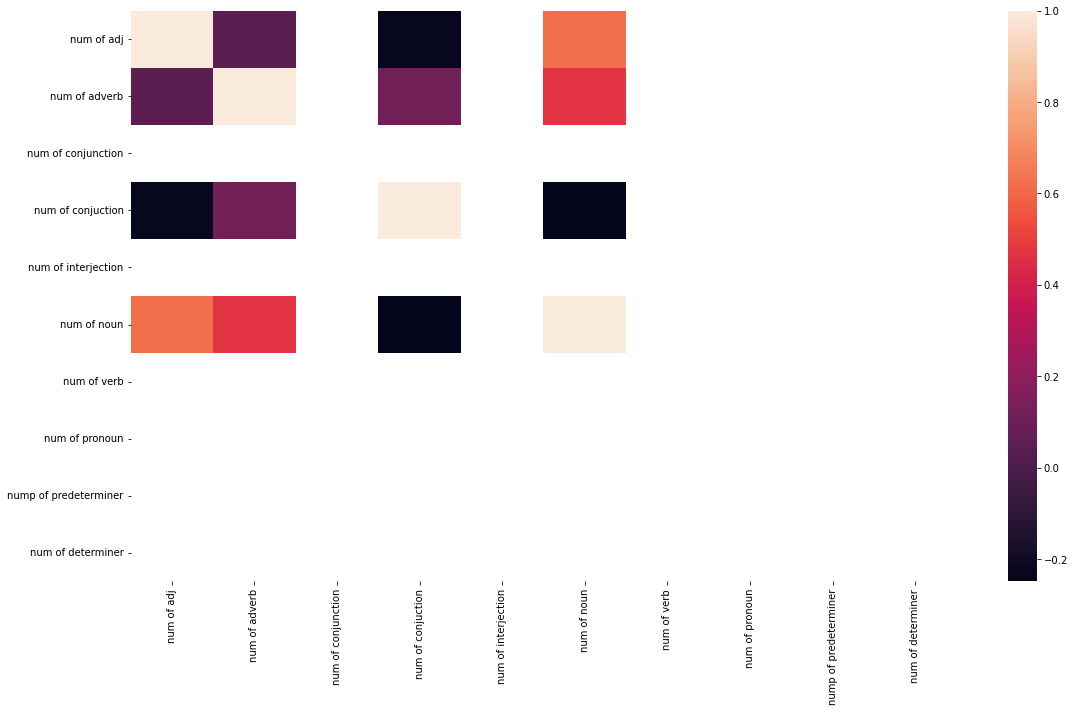

In [15]:
cor = xt.corr()
f, a = plt.subplots()
f.set_size_inches(18.5, 10.5)
sns.heatmap(cor)

In [16]:
def correlated(co, thres):
  col = []
  data = co.corr()
  for r in range(len(data.columns)):
    for c in range(r):
      if (abs(data.iloc[r, c]) > thres):
        col.append(data.columns[r])
  return col


corr = list(set(correlated(xt, 0.5)))
print(f'correlated features are: {set(corr)}')

correlated features are: {'num of noun'}


In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest.fit(xt[corr].fillna(0), yt)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [18]:
w = pd.concat([pd.Series(corr), pd.Series(forest.feature_importances_)], axis=1)
w.columns = ['columns', 'weight']
w.sort_values(by='weight', ascending=False)

,columns,weight
0,num of noun,1.0


4

In [19]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
model = SentenceTransformer('bert-base-nli-mean-tokens')
q = "Enter the Query input for spam text similarity"
qe = model.encode(q)
document_embeddings = model.encode(data_frame['preprocessed_review'].tolist())
similarities = cosine_similarity(qe.reshape(1,-1), document_embeddings).flatten()
similarities

array([0.3401773 , 0.27773404, 0.3739097 , 0.2360877 , 0.2763381 ,
       0.1716711 , 0.3362482 , 0.349448  , 0.28846523, 0.2883291 ,
       0.3401773 , 0.27773404, 0.3739097 , 0.2360877 , 0.2763381 ,
       0.1716711 , 0.3362482 , 0.349448  , 0.28846523, 0.2883291 ,
       0.3401773 , 0.27773404, 0.3739097 , 0.2360877 , 0.2763381 ,
       0.1716711 , 0.3362482 , 0.349448  , 0.2884652 , 0.2883291 ,
       0.3401773 , 0.27773404, 0.3739097 , 0.2360877 , 0.2763381 ,
       0.1716711 , 0.3362482 , 0.349448  , 0.28846523, 0.2883291 ,
       0.3401773 , 0.27773404, 0.3739097 , 0.2360877 , 0.2763381 ,
       0.1716711 , 0.3362482 , 0.349448  , 0.28846523, 0.2883291 ,
       0.3401773 , 0.27773404, 0.3739097 , 0.2360877 , 0.2763381 ,
       0.1716711 , 0.3362482 , 0.349448  , 0.2884652 , 0.2883291 ,
       0.3401773 , 0.27773404, 0.3739097 , 0.2360877 , 0.2763381 ,
       0.1716711 , 0.3362482 , 0.349448  , 0.28846523, 0.2883291 ,
       0.3401773 , 0.27773404, 0.3739097 , 0.2360877 , 0.27633

In [20]:
similarity_raw_data = pd.DataFrame(similarities.T, columns=['similarity'])
similarity_raw_data['document'] = data_frame['Title']
similarity_raw_data.sort_values(by='similarity', ascending=False, inplace=True)
print(similarity_raw_data)

     similarity           document
52     0.373910  Amazing no damage
42     0.373910  Amazing no damage
82     0.373910  Amazing no damage
72     0.373910  Amazing no damage
12     0.373910  Amazing no damage
..          ...                ...
95     0.171671         Great deal
115    0.171671         Great deal
65     0.171671         Great deal
35     0.171671         Great deal
105    0.171671         Great deal

[120 rows x 2 columns]
